# Data Cleaning & EDA

In [1]:
import requests
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


##### Read in saved csv file and saved as 'df.'

In [2]:
df = pd.read_csv('./datasets/lyft_uber.csv')

In [3]:
df['subreddit'] = df['subreddit'].str.replace('Lyft','lyft') 

In [4]:
df.head(22)

,title,selftext,name,subreddit
0,Nightlife Playlist,I usually drive people going out to clubs. I w...,t3_b5xkl4,lyft
1,Uber should add this feature to their app to m...,A woman was killed after mistaking someone els...,t3_b83pf5,uber
2,Interest in starting but I drive a Jeep,I want to start as a side business. I provide ...,t3_auo6v4,uber
3,Uber or Lyft while vacationing,"So, I would like to start doing Uber or Lyft i...",t3_b96qf0,lyft
4,"I got co-erced into getting someone a Lyft, wh...","To make a long story short, I was co-erced and...",t3_anh5bz,lyft
5,Is Uber accepting salvage cars these days?,There is a place near me called East Side Auto...,t3_au2v67,uber
6,I was able to get voice control working on my ...,"That ticket taught me a lesson, the law doesn'...",t3_b2ln5e,uber
7,Uber driver pleads guilty to kidnapping passenger,NaN,t3_b09mpc,uber
8,Is there a way to find out what date you first...,NaN,t3_awa18x,uber
9,Lyft,NaN,t3_ap4tbk,lyft


##### Checked and replaced null values, combined "title" and "selftext" columns into one "text" column.

In [5]:
df.isnull().sum()

title          0
selftext     411
name           0
subreddit      0
dtype: int64

In [6]:
df['selftext'] = df['selftext'].replace(np.NaN, " ")

In [7]:
df['text'] = df.apply(lambda x: x['title'] + x['selftext'], axis=1)

In [8]:
df['selftext'] = df['selftext'].replace(np.NaN, " ")

In [9]:
df.drop(columns=['selftext', 'title', 'name'], inplace=True)
df.head()

,subreddit,text
0,lyft,Nightlife PlaylistI usually drive people going...
1,uber,Uber should add this feature to their app to m...
2,uber,Interest in starting but I drive a JeepI want ...
3,lyft,"Uber or Lyft while vacationingSo, I would like..."
4,lyft,"I got co-erced into getting someone a Lyft, wh..."


##### Additional editing to remove messy areas of "text" content.

In [10]:
list(df['text'])

["Nightlife PlaylistI usually drive people going out to clubs. I want to make a playlist for those passengers but I'm out of touch with the nightlife scene nowadays. I'm looking for a rap/hip hop vibe. \n\nSo far what I have is:\n1. Nice for What - Drake\n2. No Mediocre (feat. Iggy Azalea) - T.I.\n3. So Excited (feat. Dre) - Fat Joe\n4. Truffle Butter (feat. Drake &amp; Lil Wayne) - Nicki Minaj\n5. Taste (feat. Offset) - Tyga\n6. Getcha Roll On (feat. Tory Lanes) - T-Pain\n\nI'm open to any suggestions",
 'Uber should add this feature to their app to make it more safe...A woman was killed after mistaking someone else as her uber driver.  One way to prevent this is to add a feature to the app to let the uber passengers know that their uber driver has arrived.  Basically, before any uber user goes inside the car, they should get a message in their app saying that their driver has arrived AND that the drivers can see their passengers outside the car.  Had this feature been on the app, the

In [11]:
df['text'] = df['text'].str.replace('\n',' ')

In [12]:
df['text'] = df['text'].str.replace("\'",'')

In [13]:
df['text'] = df['text'].str.replace('&amp;#x200B;','') 

In [14]:
df['text'] = df['text'].str.replace('&gt;','') 

In [15]:
df['text'] = df['text'].str.replace('\t','')  

In [16]:
list(df['text'])

['Nightlife PlaylistI usually drive people going out to clubs. I want to make a playlist for those passengers but Im out of touch with the nightlife scene nowadays. Im looking for a rap/hip hop vibe.   So far what I have is: 1. Nice for What - Drake 2. No Mediocre (feat. Iggy Azalea) - T.I. 3. So Excited (feat. Dre) - Fat Joe 4. Truffle Butter (feat. Drake &amp; Lil Wayne) - Nicki Minaj 5. Taste (feat. Offset) - Tyga 6. Getcha Roll On (feat. Tory Lanes) - T-Pain  Im open to any suggestions',
 'Uber should add this feature to their app to make it more safe...A woman was killed after mistaking someone else as her uber driver.  One way to prevent this is to add a feature to the app to let the uber passengers know that their uber driver has arrived.  Basically, before any uber user goes inside the car, they should get a message in their app saying that their driver has arrived AND that the drivers can see their passengers outside the car.  Had this feature been on the app, the woman would 

##### # Binarized "subreddit" column as this will be the target.

In [17]:
df['subreddit'] = df['subreddit'].map({'lyft': 0, 'uber': 1})
df.head()

,subreddit,text
0,0,Nightlife PlaylistI usually drive people going...
1,1,Uber should add this feature to their app to m...
2,1,Interest in starting but I drive a JeepI want ...
3,0,"Uber or Lyft while vacationingSo, I would like..."
4,0,"I got co-erced into getting someone a Lyft, wh..."


##### Confirmed classes are evenly balanced.

In [19]:
df['subreddit'].value_counts(normalize=True)

0    0.500357
1    0.499643
Name: subreddit, dtype: float64

##### Saved updated dataframe as a new csv to be used later for modeling.

In [20]:
df.to_csv('./datasets/lyft_uber_all.csv', index=False)

##### Used Count Vectorizer for initial analysis on top words and word count distribution.

In [21]:
# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words="english")

In [22]:
# Fit the vectorizer on our corpus
cvec = cv.fit_transform(df['text'])

In [23]:
count_df = pd.DataFrame(cvec.toarray(), columns=cv.get_feature_names())

In [24]:
count_df.head()

,00,000,0001,00am,00on,00pm,02usd,03,04am,04pm,...,zlgoprd,zombie,zone,zoneanyone,zones,zonethis,zoom,zoomed,zooming,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
count_df.describe().T

,count,mean,std,min,25%,50%,75%,max
00,1401.0,0.011420,0.130431,0.0,0.0,0.0,0.0,3.0
000,1401.0,0.010707,0.138459,0.0,0.0,0.0,0.0,4.0
0001,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
00am,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
00on,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
00pm,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
02usd,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
03,1401.0,0.001428,0.037769,0.0,0.0,0.0,0.0,1.0
04am,1401.0,0.000714,0.026717,0.0,0.0,0.0,0.0,1.0
04pm,1401.0,0.001428,0.037769,0.0,0.0,0.0,0.0,1.0


In [26]:
df['text'][1]

'Uber should add this feature to their app to make it more safe...A woman was killed after mistaking someone else as her uber driver.  One way to prevent this is to add a feature to the app to let the uber passengers know that their uber driver has arrived.  Basically, before any uber user goes inside the car, they should get a message in their app saying that their driver has arrived AND that the drivers can see their passengers outside the car.  Had this feature been on the app, the woman would not have gone inside the wrong car.'

In [27]:
count_df.shape

(1401, 7740)

In [28]:
count_df['y_target'] = df['subreddit']

In [29]:
count_df[count_df['y_target'] == 0].sum().sort_values(ascending=False).head(22)

lyft         991
ride         426
driver       357
just         292
drivers      240
time         238
car          223
like         210
rides        187
passenger    167
im           159
drive        159
got          157
app          151
uber         150
way          148
know         137
driving      134
make         121
pax          115
going        113
phone        112
dtype: int64

In [30]:
count_df[count_df['y_target'] == 1].sum().sort_values(ascending=False).head(50)

uber         1217
y_target      700
driver        425
just          318
ride          265
drivers       229
app           216
car           214
im            207
account       204
time          188
like          185
got           177
know          164
dont          150
card          137
phone         135
number        126
use           125
trip          120
driving       118
minutes       116
way           114
want          108
work          107
said           99
people         99
drive          98
support        98
tip            98
rides          95
going          95
help           91
make           90
ive            90
did            89
new            88
need           87
told           86
does           85
getting        85
really         84
pay            80
passenger      76
lyft           75
charged        75
email          74
using          71
used           71
day            70
dtype: int64

In [32]:
count_df.sum(axis=1).head()

0    56
1    46
2    22
3    37
4    94
dtype: int64

##### Added a "word count" column and calculated the mean word count for a post of each subreddit.

In [33]:
count_df['word count'] = count_df.sum(axis=1)

In [35]:
count_df[count_df['y_target'] == 0]['word count'].mean()

42.982881597717544

In [36]:
count_df[count_df['y_target'] == 1]['word count'].mean()

43.817142857142855

In [37]:
# plt.figure(figsize=(20,10))
# plt.hist([count_df[count_df['y_target']==0]['word_count'], count_df[count_df['y_target']==1]['word_count']],
#          bins=20, color=['goldenrod', 'grey'], ec='k')
# plt.title('Word Count by Class', fontsize=30)
# plt.legend(['lyft', 'uber'])

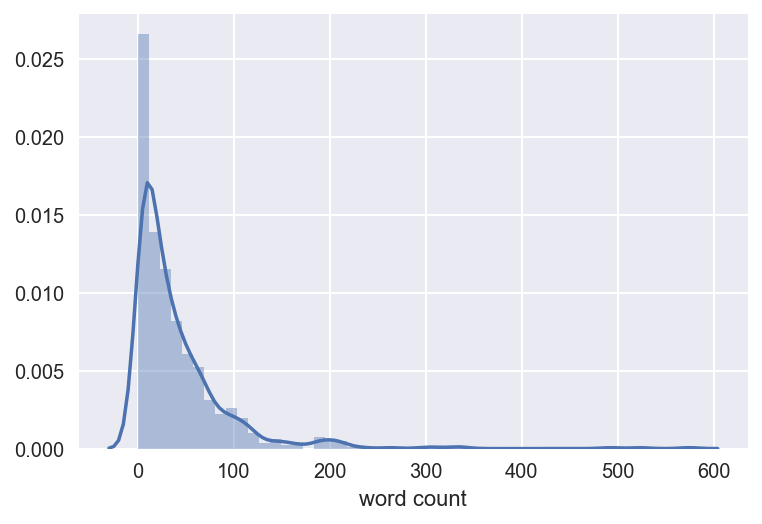

In [38]:
sns.distplot(count_df[count_df['y_target'] == 0]['word count'])

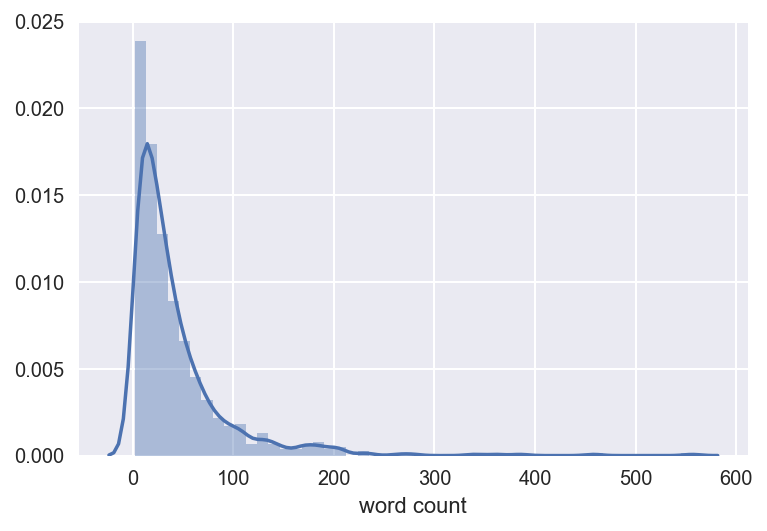

In [39]:
sns.distplot(count_df[count_df['y_target'] == 1]['word count'])

<Figure size 504x288 with 0 Axes>

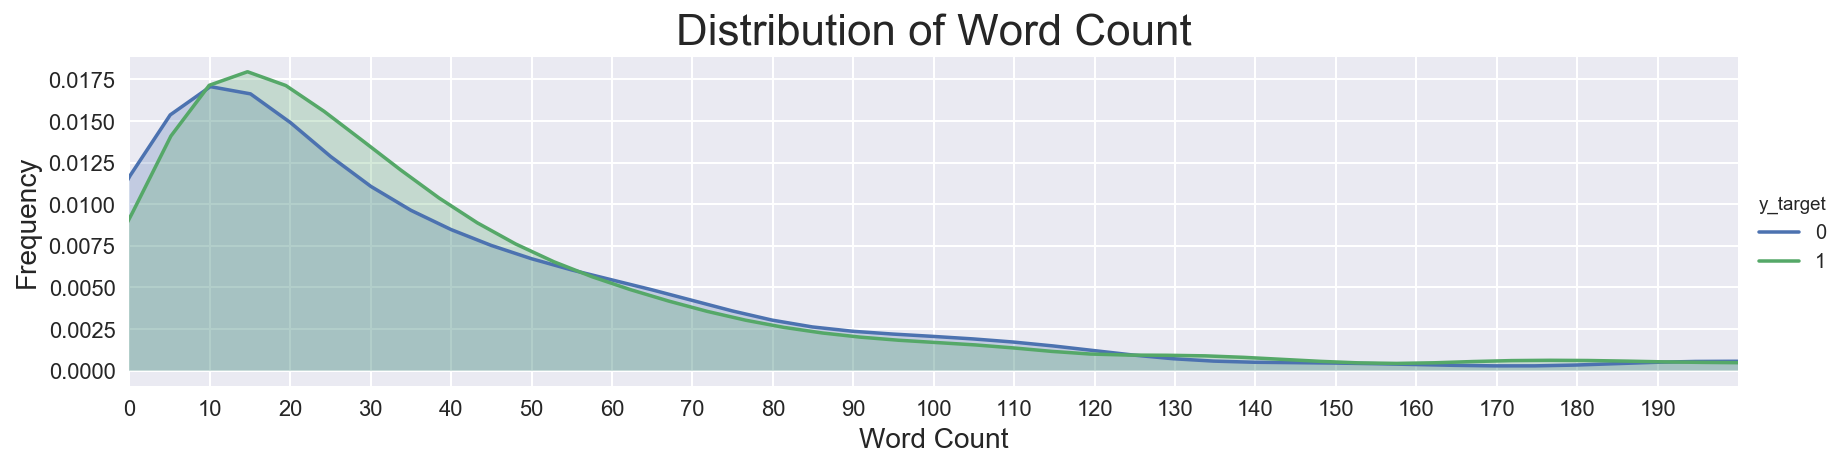

In [40]:
#adapted from lecture and another version online

plt.figure(figsize=(7, 4))
count_plot = sns.FacetGrid(count_df, hue='y_target', aspect=4)
count_plot.map(sns.kdeplot, "word count", shade=True).add_legend()
count_plot.set(xlim=(0, 200))
plt.yticks(fontsize=11);
plt.xticks(np.arange(0, 200, step=10), fontsize=11); #rotation=72,
plt.title('Distribution of Word Count', fontsize=22)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

<Figure size 504x288 with 0 Axes>

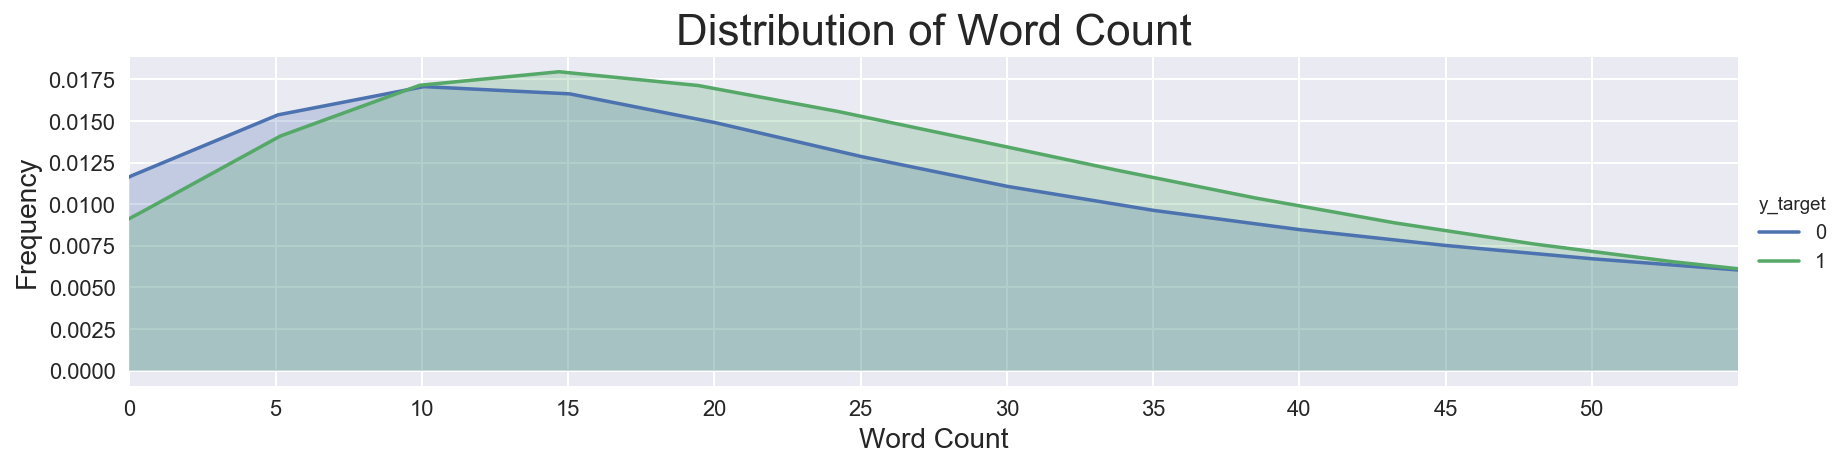

In [41]:
#adapted from lecture and another version online

plt.figure(figsize=(7, 4))
count_plot = sns.FacetGrid(count_df, hue='y_target', aspect=4)
count_plot.map(sns.kdeplot, "word count", shade=True,).add_legend()
count_plot.set(xlim=(0, 55))
plt.yticks(fontsize=11);
plt.xticks(np.arange(0, 55, step=5), fontsize=11);
plt.title('Distribution of Word Count', fontsize=22)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

In [42]:
words = list(df['text'])
words[27]

'Scam or not? I got this message a few minutes ago. I drive a 2012 Audi Q7 and thought it was one year too old in my market for LuxBlack..did the requirements change in the Bay Area? I’m afraid to click the link and it hasn’t been updated in the app. '

In [43]:
count_df.head()

,00,000,0001,00am,00on,00pm,02usd,03,04am,04pm,...,zone,zoneanyone,zones,zonethis,zoom,zoomed,zooming,über,y_target,word count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,46
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,22
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94


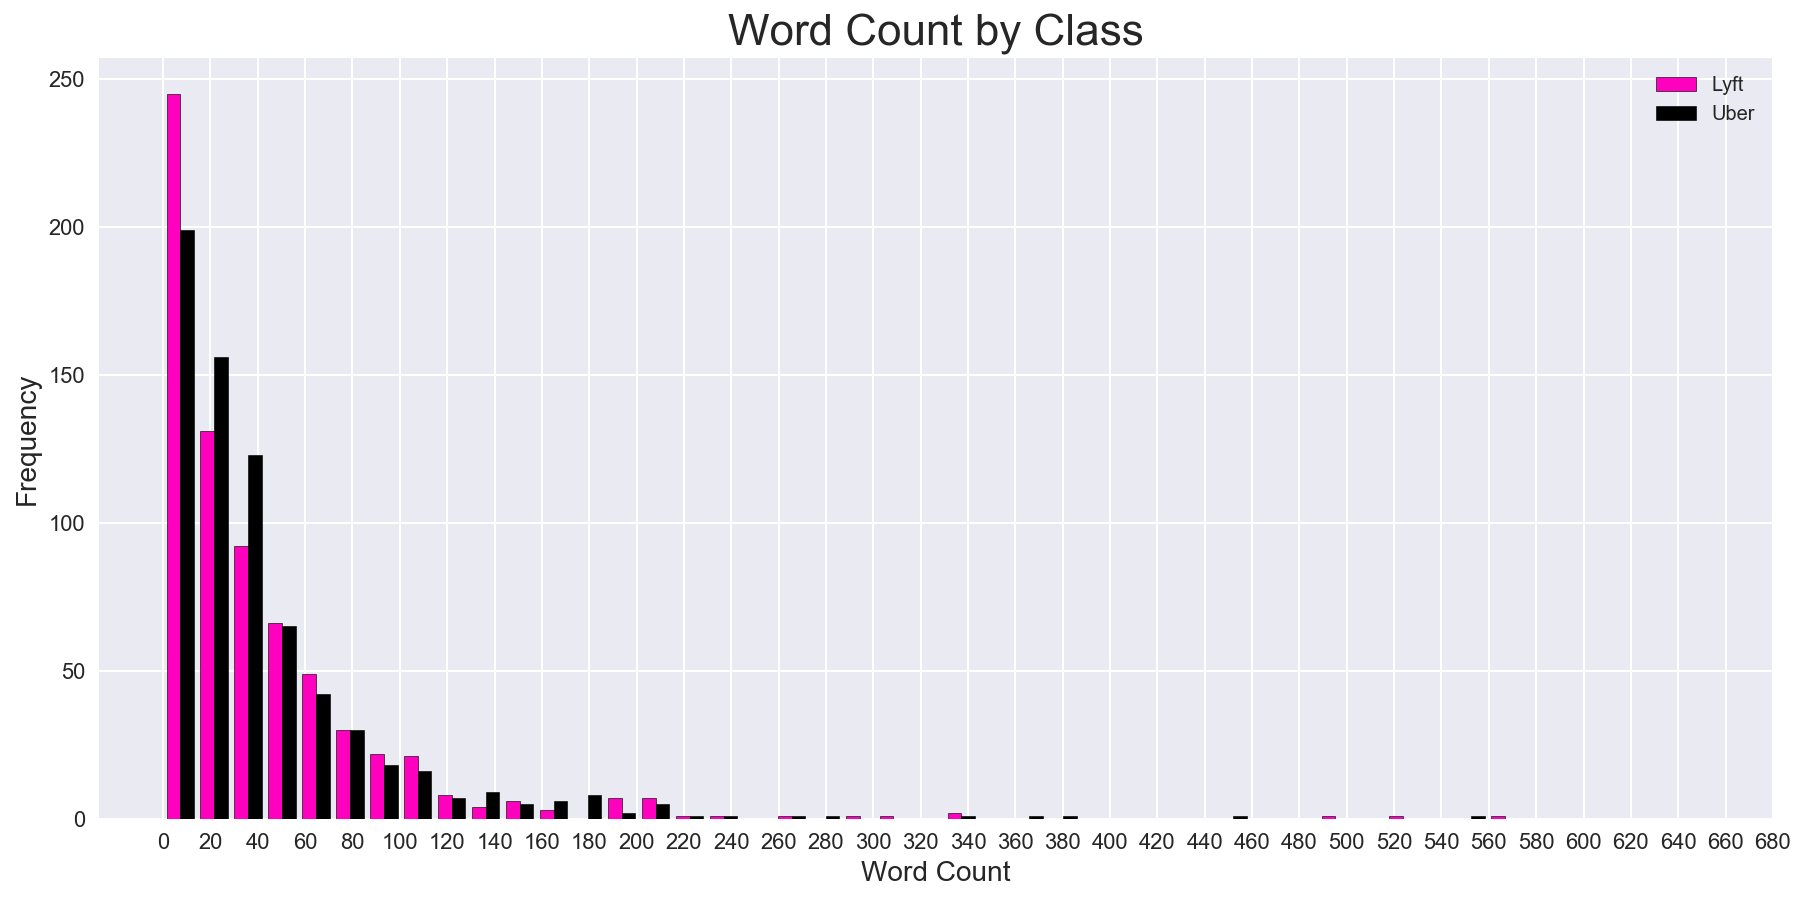

In [44]:
plt.figure(figsize=(15,7))
plt.hist([count_df[count_df['y_target']==0]['word count'], count_df[count_df['y_target']==1]['word count']], bins=40, 
          color=['#ff00bf', 'k'], ec='k')
plt.title('Word Count by Class', fontsize=22)
plt.legend(['Lyft', 'Uber'])
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14);
plt.yticks(fontsize=11);
plt.xticks(np.arange(0, 700, step=20), fontsize=11);

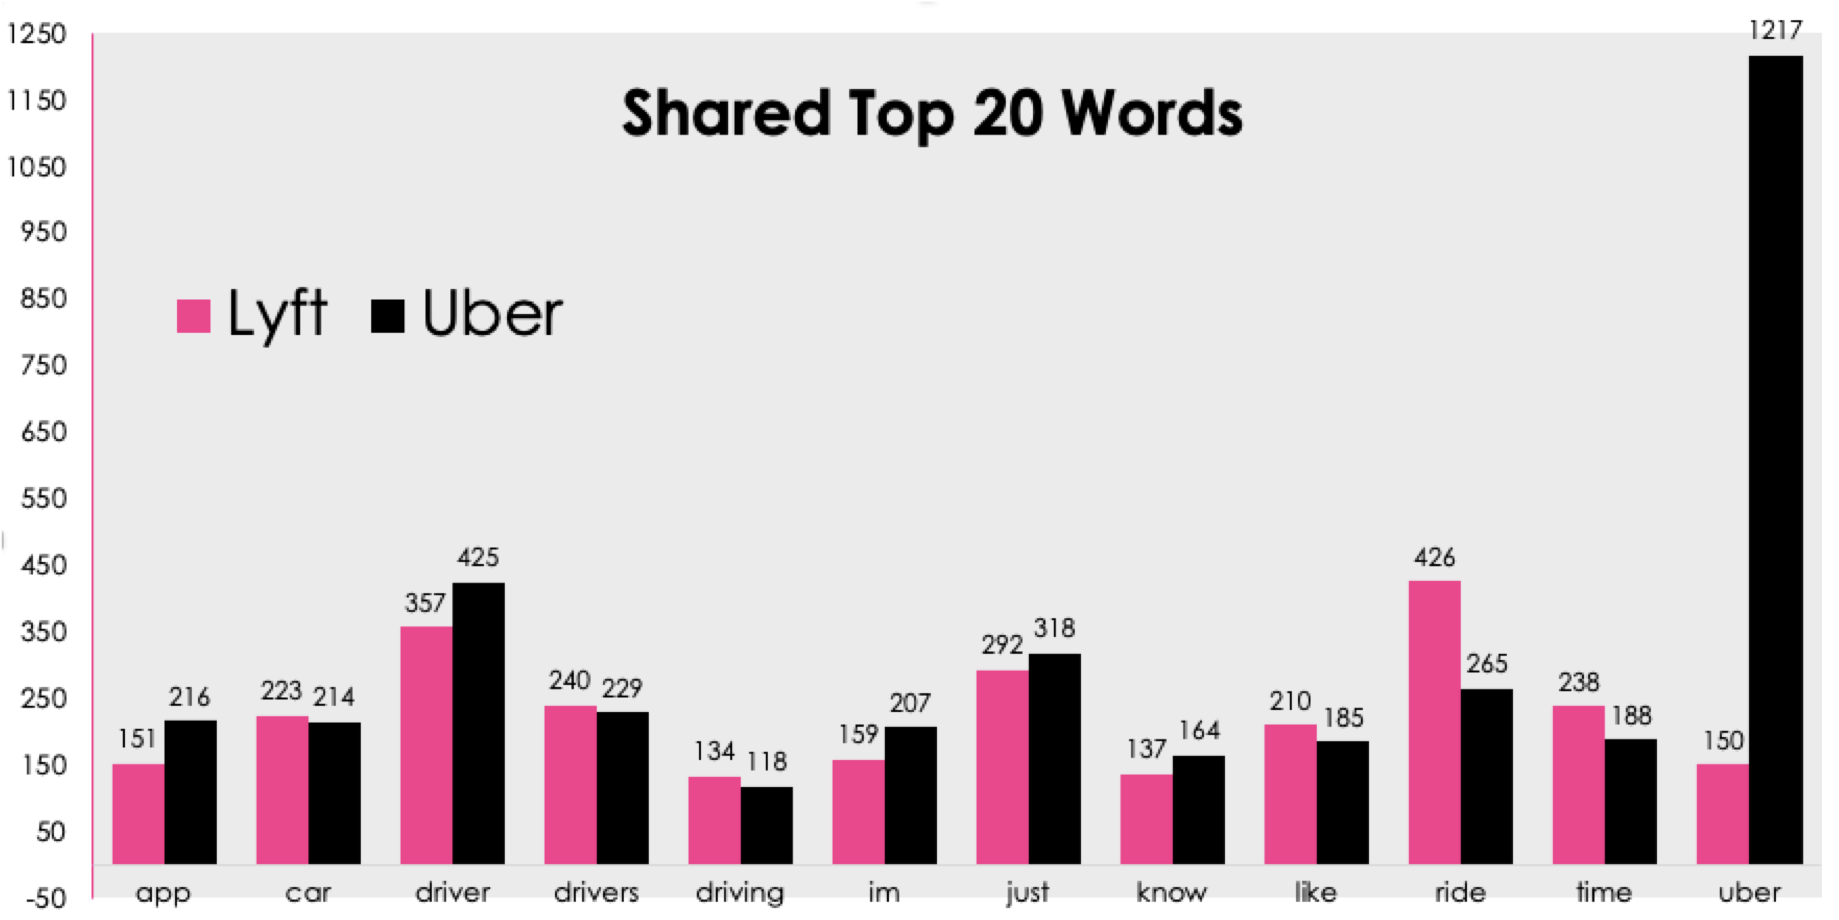

In [45]:
#uploaded image used in presentation
from IPython.display import Image
Image('./images/top20words.png', width=700, height=200)

#####  Observations:
-Uber posts have a mean of 42.98 words while Lyft posts average 43.82 words. <br>
-The overall word count distribution is quite similar between the two classes - very positively skewed with the majority of posts containing 0-70 words (some have 0 words but have an image, video, or link attached). <br>
-If we zoom in a little, there is a slightly higher occurence of Uber posts between 0-9 words and Lyft posts between 10-53 words.<br>
-There are 12 words that appeared in the top 20 highest occuring words for both subreddits. <br>
-Of the top 20 words, most are more or less evenly distributed amongst the two classes (sometimes higher in one subreddit than another), however there are bigger gaps between the word 'ride' (426 times in the Lyft posts vs. 265 times in the Uber posts), and most drastically with the word 'uber'(1217 times in the Uber posts vs. 150 times in the Lyft posts).<br>
-For each subredddit, the most common word is that respective word itself, with 'lyft' appearing 991 times in the Lyft posts and 'uber' appearing 1217 times in the Uber posts. <br>
-Interesting: The word 'uber' is the 15th most common word of the Lyft posts, however 'lyft' is the 45th most common word in the Uber posts.